<a href="https://colab.research.google.com/github/zepolenta/Curso-EBAC/blob/main/Varia%C3%A7%C3%B5es_da_Prata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy scikit-learn matplotlib yfinance

[*********************100%%**********************]  1 of 1 completed
Erro Médio Absoluto: 5.0019424542773585
Maior Queda: -0.8127380301357866
Maior Alta: 4.340112574513212


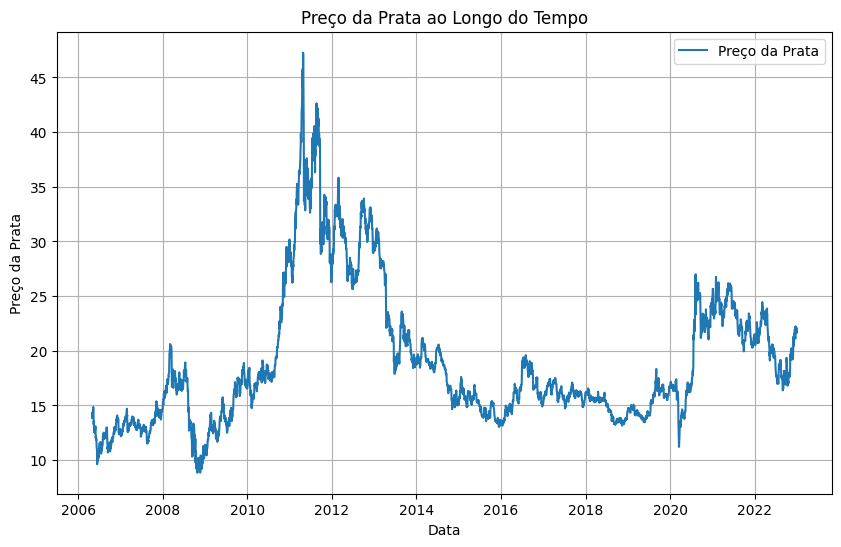

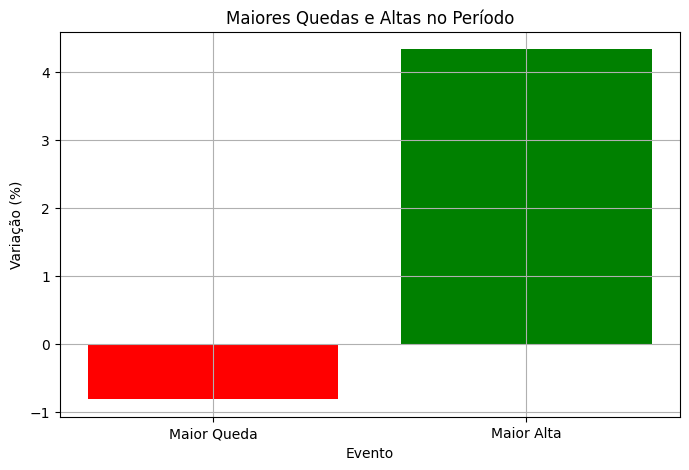

In [8]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Definir o período para obter os dados históricos
start_date = "1900-01-01"
end_date = "2023-01-01"
symbol = "SLV"  # Símbolo do ETF de prata no Yahoo Finance

# Obter dados históricos da prata usando a biblioteca yfinance
data = yf.download(symbol, start=start_date, end=end_date)

# Calcular retornos diários
data['Daily_Return'] = data['Adj Close'].pct_change()

# Remover a primeira linha que conterá um valor NaN
data = data.dropna()

# Definir variável alvo (preço ajustado) e recursos (retornos diários anteriores)
X = data[['Daily_Return']].values
y = data['Adj Close'].values

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mae = np.mean(np.abs(y_pred - y_test))
print("Erro Médio Absoluto:", mae)

# Calcular as maiores quedas e altas no período especificado
max_drop = data['Adj Close'].min() / data['Adj Close'].max() - 1
max_gain = data['Adj Close'].max() / data['Adj Close'].min() - 1

print("Maior Queda:", max_drop)
print("Maior Alta:", max_gain)

# Criar gráfico de linha com preços ajustados
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Adj Close'], label='Preço da Prata')
plt.xlabel('Data')
plt.ylabel('Preço da Prata')
plt.title('Preço da Prata ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.show()

# Criar gráfico de barras para maiores quedas e altas
plt.figure(figsize=(8, 5))
plt.bar(['Maior Queda', 'Maior Alta'], [max_drop, max_gain], color=['red', 'green'])
plt.xlabel('Evento')
plt.ylabel('Variação (%)')
plt.title('Maiores Quedas e Altas no Período')
plt.grid(True)
plt.show()